# Whats here
used to eval output jsonL files made by LetsDriftGemma2_V2 experiments

Can be used while the model is generating the answers.


# SETUP NOTEBOOK (filename.jsonl)
Conda Env lets_drift_env_V1

In [13]:
jsonl_folder_name = '77to82Hotpot_negative_v2_fixed'

### Imports

In [14]:
from rich.console import Console
from rich.table import Table
import json

from ipywidgets import interact, IntSlider, Button, Text, HBox, VBox, Layout
from IPython.display import clear_output
import ipywidgets as widgets

import re 
import os


# Complete Table with steered and unsteered answers

In [15]:
def create_results_table(jsonl_folder):
    # Create table
    table = Table(title="Model Responses")
    
    # Add columns
    table.add_column("ID", style="white", justify="right")
    table.add_column("Prompt", style="cyan", no_wrap=False)
    table.add_column("Ref_Answer", style="magenta")
    table.add_column("Unsteered_Answer", style="green", no_wrap=False)
    table.add_column("Steered_Answer_1", style="yellow", no_wrap=False)
    table.add_column("Steered_Answer_2", style="yellow", no_wrap=False)
    
    # Get all JSONL files from folder
    import os
    import re
    
    jsonl_files = [f for f in os.listdir(jsonl_folder) if f.endswith('.jsonl')]
    
    def extract_id(filename):
        # Use regex to find the number after 'ID'
        match = re.search(r'ID(\d+)', filename)
        if match:
            return int(match.group(1))
        return 0  # Default value if no ID found
    
    # Sort files using the new extract_id function
    for filename in sorted(jsonl_files, key=extract_id):
        filepath = os.path.join(jsonl_folder, filename)
        try:
            answers = {"unsteered": "", "steered1": "", "steered2": ""}
            metadata = {}
            
            with open(filepath, 'r') as file:
                for line in file:
                    data = json.loads(line.strip())
                    
                    # Extract metadata
                    if "Prompt_ID" in data:
                        metadata = data
                    # Extract unsteered answer
                    elif "Answer_No_Steering" in data:
                        answers["unsteered"] = data["Answer_No_Steering"].strip()
                    # Extract steered answers
                    elif "Answer_Steered1" in data:
                        answers["steered1"] = data["Answer_Steered1"].strip()
                    elif "Answer_Steered2" in data:
                        answers["steered2"] = data["Answer_Steered2"].strip()
            
            if metadata:  # Only add row if we found metadata
                table.add_row(
                    str(metadata["Prompt_ID"]),
                    metadata["Prompt"],
                    metadata["Ref_answer"],
                    answers["unsteered"],
                    answers["steered1"],
                    answers["steered2"]
                )

        except Exception as e:
            print(f"Error processing file {filename}: {e}")
            continue
    
    # Display table
    console = Console()
    console.print(table)

In [16]:
# Use the function if needed: (has been adapted for v2 fixed)
# create_results_table(jsonl_folder_name)

# FIND Metadata

In [17]:
def display_folder_contents(folder_path):
    # Read metadata file
    metadata_file = os.path.join(folder_path, "metadata.jsonl")
    
    # Create table for display
    table = Table(title=f"Metadata for {folder_path}")
    table.add_column("Parameter", style="cyan")
    table.add_column("Value", style="yellow", no_wrap=False)
    
    # Read metadata
    try:
        with open(metadata_file, 'r') as file:
            metadata = json.loads(file.readline().strip())
            
            # Add rows to table
            for key, value in metadata.items():
                table.add_row(
                    key.replace('_', ' ').title(),  # Format key name
                    str(value)  # Convert value to string
                )
    except Exception as e:
        print(f"Error reading metadata file: {e}")
        return
    
    # Count files in folder (excluding metadata.jsonl)
    try:
        all_files = os.listdir(folder_path)
        num_files = len([f for f in all_files if f != "metadata.jsonl"])
        table.add_row("Number of Result Files", str(num_files))
    except Exception as e:
        print(f"Error counting files: {e}")
        return
    
    # Display table
    console = Console()
    console.print(table)

In [18]:
# Use the function
display_folder_contents(jsonl_folder_name)

                                    Metadata for 77to82Hotpot_negative_v2_fixed                                    
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Parameter                    ┃ Value                                                                            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Dataset                      │ 77_82HOTPOTQA                                                                    │
│ Starting Prompt Id           │ 77                                                                               │
│ Model                        │ gemma-2-9b-it                                                                    │
│ Sae Release                  │ gemma-scope-9b-it-res-canonical                                                  │
│ Sae Id                       │ layer_9/width_131k/canonical                                                     │
│ Steered Latent Id            │ 120550                                                                           │
│ Steering Coefficient         │ 39                                                                               │
│ Max New Tokens               │ 1300                                                                             │
│ Temperature                  │ 0.02                                                                             │
│ Frequency Penalty            │ 1.5                                                                              │
│ Verbose                      │ False                                                                            │
│ Incremental Temperature      │ True                                                                             │
│ Comment                      │ negat                                                                            │
│ Other Hookedsaetransformers: │ Rel: gemma-scope-9b-it-res-canonicalIDs: layer_31/width_131k/canonical &         │
│                              │ layer_31/width_131k/canonical                                                    │
│ Number of Result Files       │ 5                                                                                │
└──────────────────────────────┴──────────────────────────────────────────────────────────────────────────────────┘

In [19]:
# Get first non-metadata jsonl file in folder
jsonl_files = [f for f in os.listdir(jsonl_folder_name) if f.endswith('.jsonl') and f != 'metadata.jsonl']
if jsonl_files:
    first_jsonl = os.path.join(jsonl_folder_name, jsonl_files[0])
    print(f"Reading the beginning of each line of the first found non-metadata file: {jsonl_files[0]}\n")
    
    with open(first_jsonl, 'r') as file:
        print("First 200 characters of each line:")
        for i, line in enumerate(file):
            print(f"\nLine {i}:")
            print(line[:40])
else:
    print("No non-metadata JSONL files found in folder")

Reading the beginning of each line of the first found non-metadata file: ID77_out.jsonl

First 200 characters of each line:

Line 0:
{"Prompt_ID": 77, "Prompt": "Alvaro Mexi

Line 1:
{"Answer_No_Steering": "\n\nAlvaro Mexia

Line 2:
{"Output_Tokens_Answer_No_Steering": [10

Line 3:
{"Activations_Answer_No_Steering_layer9"

Line 4:
{"Activations_Answer_No_Steering_layer20

Line 5:
{"Activations_Answer_No_Steering_layer31

Line 6:
{"SAE_Activations_Answer_No_Steering_lay

Line 7:
{"SAE_Activations_Answer_No_Steering_lay

Line 8:
{"SAE_Activations_Answer_No_Steering_lay

Line 9:
{"Answer_Steered1": "\n\nAlvaro Mexia ha

Line 10:
{"Output_Tokens_Answer_Steered1": [109, 

Line 11:
{"Activations_Answer_Steered1_layer9": [

Line 12:
{"Activations_Answer_Steered1_layer20": 

Line 13:
{"Activations_Answer_Steered1_layer31": 

Line 14:
{"SAE_Activations_Answer_Steered1_layer9

Line 15:
{"SAE_Activations_Answer_Steered1_layer2

Line 16:
{"SAE_Activations_Answer_Steered1_layer3

Line 17:
{"Answer_

# DISPLAY individual prompts together with answers using slider

In V2: Not yet implemented


In V1:Works while model is generating the answers :)

In [20]:
"""from ipywidgets import interact, IntSlider
import ipywidgets as widgets
def create_results_table(jsonl_file, start_row=None, end_row=None):
    # Create table
    table = Table(title="Model Responses")
    
    # Add columns
    table.add_column("Row", style="white")
    table.add_column("Prompt", style="cyan", no_wrap=False)
    table.add_column("Ref_Answer", style="magenta")
    table.add_column("Unsteered_Answer", style="green", no_wrap=False)
    table.add_column("Steered_Answer_0", style="yellow", no_wrap=False)
    table.add_column("Steered_Answer_1", style="yellow", no_wrap=False)
    
    # Read and parse JSONL file
    with open(jsonl_file, 'r') as file:
        lines = file.readlines()
        
        # Handle row selection
        if start_row is None:
            start_row = 0
        if end_row is None:
            end_row = len(lines)
        
        # Ensure valid row ranges
        start_row = max(0, start_row)
        end_row = min(len(lines), end_row)
        
        # Process selected rows
        for row_idx, line in enumerate(lines[start_row:end_row], start=start_row):
            try:
                # ... existing JSON parsing code ...
                json_strings = line.replace('}{', '}\n{').split('\n')
                json_objects = [json.loads(s) for s in json_strings if s.strip()]
                
                if len(json_objects) >= 2:
                    metadata = json_objects[0]
                    unsteered = json_objects[1]
                    
                    steered_answers = []
                    for i in range(2, len(json_objects)):
                        if f'Answer_Steered{i-2}' in json_objects[i]:
                            steered_answers.append(json_objects[i][f'Answer_Steered{i-2}'][0])
                    
                    while len(steered_answers) < 2:
                        steered_answers.append("N/A")
                    
                    # Add row number to the table
                    table.add_row(
                        str(row_idx),  # Row number
                        metadata['Prompt'],
                        metadata['Ref_answer'],
                        unsteered['Answer_No_Steering'][0],
                        *steered_answers
                    )

            except json.JSONDecodeError as e:
                print(f"Error parsing JSON in row {row_idx}: {e}")
                continue
    
    console = Console()
    console.print(table)

# Example usage:
# Show all rows
#create_results_table('output.jsonl')
# Show rows 5 to 10
# create_results_table('output.jsonl', start_row=5, end_row=10)
# Show first 5 rows
# create_results_table('output.jsonl', end_row=5)


"""

'from ipywidgets import interact, IntSlider\nimport ipywidgets as widgets\ndef create_results_table(jsonl_file, start_row=None, end_row=None):\n    # Create table\n    table = Table(title="Model Responses")\n    \n    # Add columns\n    table.add_column("Row", style="white")\n    table.add_column("Prompt", style="cyan", no_wrap=False)\n    table.add_column("Ref_Answer", style="magenta")\n    table.add_column("Unsteered_Answer", style="green", no_wrap=False)\n    table.add_column("Steered_Answer_0", style="yellow", no_wrap=False)\n    table.add_column("Steered_Answer_1", style="yellow", no_wrap=False)\n    \n    # Read and parse JSONL file\n    with open(jsonl_file, \'r\') as file:\n        lines = file.readlines()\n        \n        # Handle row selection\n        if start_row is None:\n            start_row = 0\n        if end_row is None:\n            end_row = len(lines)\n        \n        # Ensure valid row ranges\n        start_row = max(0, start_row)\n        end_row = min(len(li

In [21]:
"""# Get total number of lines in the file
with open(jsonl_file_name, 'r') as file:
    total_rows = sum(1 for line in file)

@interact(
    start_row=IntSlider(min=0, max=total_rows-1, step=1, value=0, description='Start Row:'),
    end_row=IntSlider(min=1, max=total_rows, step=1, value=min(5, total_rows), description='End Row:')
)
def display_table(start_row, end_row):
    if start_row >= end_row:
        print("Start row must be less than end row")
        return
    create_results_table(jsonl_file_name, start_row=start_row, end_row=end_row)

# The widget will appear automatically when you run this cell"""

'# Get total number of lines in the file\nwith open(jsonl_file_name, \'r\') as file:\n    total_rows = sum(1 for line in file)\n\n@interact(\n    start_row=IntSlider(min=0, max=total_rows-1, step=1, value=0, description=\'Start Row:\'),\n    end_row=IntSlider(min=1, max=total_rows, step=1, value=min(5, total_rows), description=\'End Row:\')\n)\ndef display_table(start_row, end_row):\n    if start_row >= end_row:\n        print("Start row must be less than end row")\n        return\n    create_results_table(jsonl_file_name, start_row=start_row, end_row=end_row)\n\n# The widget will appear automatically when you run this cell'

# Dynamic Eval Table - manually say if the answer was correct or not


In [22]:
from IPython.display import clear_output

In [23]:
class EvaluationTool:
    def __init__(self, jsonl_folder):
        self.jsonl_folder = jsonl_folder
        
        # Get all JSONL files from folder. excluding metadata.ksonl
        self.jsonl_files = [f for f in os.listdir(jsonl_folder) 
                           if f.endswith('.jsonl') and f != 'metadata.jsonl'] #Note: add further exceptions here if needed or just exclude all that are not named ID_*
        self.jsonl_files.sort(key=lambda x: int(re.search(r'ID(\d+)', x).group(1)))
        
        # Find first unevaluated file
        self.current_file_idx = self.find_next_unevaluated_file(0)
        
        # Create widgets
        self.matrix_inputs = [
            widgets.Text(
                value='', 
                placeholder='Enter 1 or 0', 
                description=f'{"Unsteered" if i==0 else f"Steered {i}"}:'
            )
            for i in range(3)  # One for unsteered, two for steered
        ]
        
        self.next_button = Button(description='Save & Next')
        self.next_button.on_click(self.save_and_next)
        
        # Display initial file if there are unevaluated files
        if self.current_file_idx is not None:
            self.display_current_file()
        else:
            print("All files have been evaluated!")

    @classmethod
    def clean_answer(cls, answer):
        # Remove common formatting
        answer = answer.replace('<bos>', '').replace('<eos>', '').replace('<end_of_turn>', '')
        # Clean up any leftover whitespace/newlines
        return ' '.join(answer.split())

    def find_next_unevaluated_file(self, start_from):
        for idx in range(start_from, len(self.jsonl_files)):
            filepath = os.path.join(self.jsonl_folder, self.jsonl_files[idx])
            with open(filepath, 'r') as file:
                if not any('"evaluation":' in line for line in file): 
                    return idx
        return None
    
    def display_current_file(self):
        clear_output(wait=True)
        
        if self.current_file_idx is None:
            print("All files have been evaluated!")
            return
        
        current_file = self.jsonl_files[self.current_file_idx]
        filepath = os.path.join(self.jsonl_folder, current_file)
        
        # Create table
        table = Table(title=f"File {current_file} Evaluation")
        table.add_column("Type", style="cyan")
        table.add_column("Content", style="white", no_wrap=False)
        
        try:
            answers = {"unsteered": "", "steered1": "", "steered2": ""}
            metadata = {}
            
            with open(filepath, 'r') as file:
                for line in file:
                    data = json.loads(line.strip())
                    
                    # Extract metadata
                    if "Prompt_ID" in data:
                        metadata = data
                    # Extract unsteered answer
                    elif "Answer_No_Steering" in data:
                        answers["unsteered"] = data["Answer_No_Steering"].strip()
                    # Extract steered answers
                    elif "Answer_Steered1" in data:
                        answers["steered1"] = data["Answer_Steered1"].strip()
                    elif "Answer_Steered2" in data:
                        answers["steered2"] = data["Answer_Steered2"].strip()
            
            if metadata:
                # Display data in table
                table.add_row("Prompt", metadata["Prompt"])
                table.add_row("Reference Answer", metadata["Ref_answer"], style="bright_red")
                table.add_row("Unsteered Answer", self.clean_answer(answers["unsteered"]))
                if answers["steered1"]:
                    table.add_row("Steered Answer 1", self.clean_answer(answers["steered1"]))
                if answers["steered2"]:
                    table.add_row("Steered Answer 2", self.clean_answer(answers["steered2"]))
            
            # Display table
            console = Console()
            console.print(table)
            
            # Update visible matrix inputs based on number of answers
            num_answers = 1  # Unsteered
            if answers["steered1"]: num_answers += 1
            if answers["steered2"]: num_answers += 1
            
            for i, input_widget in enumerate(self.matrix_inputs):
                input_widget.layout.display = 'none' if i >= num_answers else 'flex'
            
            # Display widgets
            display(VBox([
                widgets.HTML(value=f"<b>File {current_file}: Enter 1 for correct, 0 for incorrect:</b>"),
                *self.matrix_inputs,
                self.next_button
            ]))
            
        except Exception as e:
            print(f"Error processing file {current_file}: {e}")
    
    def save_and_next(self, b):
        # Collect evaluations
        evaluations = [inp.value for inp in self.matrix_inputs if inp.layout.display != 'none']
        
        # Validate inputs
        if not all(ev in ['0', '1'] for ev in evaluations if ev):
            print("Error: Please enter only 0 or 1 for each answer")
            return
        
        # Create evaluation object
        eval_obj = {
            "evaluation": evaluations
        }
        
        # Append evaluation to the current file
        current_file = self.jsonl_files[self.current_file_idx]
        filepath = os.path.join(self.jsonl_folder, current_file)
        
        with open(filepath, 'a') as file:
            file.write(json.dumps(eval_obj) + '\n')
        
        # Find next unevaluated file
        self.current_file_idx = self.find_next_unevaluated_file(self.current_file_idx + 1)
        
        # Clear input values
        for inp in self.matrix_inputs:
            inp.value = ''
        
        # Display next file or completion message
        if self.current_file_idx is not None:
            self.display_current_file()
        else:
            clear_output(wait=True)
            print("Evaluation complete! All files have been evaluated.")

In [24]:
# Create and start the evaluation tool
evaluator = EvaluationTool(jsonl_folder_name)

Evaluation complete! All files have been evaluated.


#### Notes about 77to82 Hotpot Negative:
- not enough steering. Answers are marginally different; if non-steered is correct, so are the steered. No 'negative' connotations to be found

#### Notes about 77-79 USMLE negative v2 fixed
- steering of 30 on first run, 15 on second --> Doesn't change the output much. Try again with a bit more.

#### Notes about eval of 60-75 USMLE negative v2 fixed.

Steering must be way too strong: answers are nonsense. Could still try n add a few of these to the final eval!
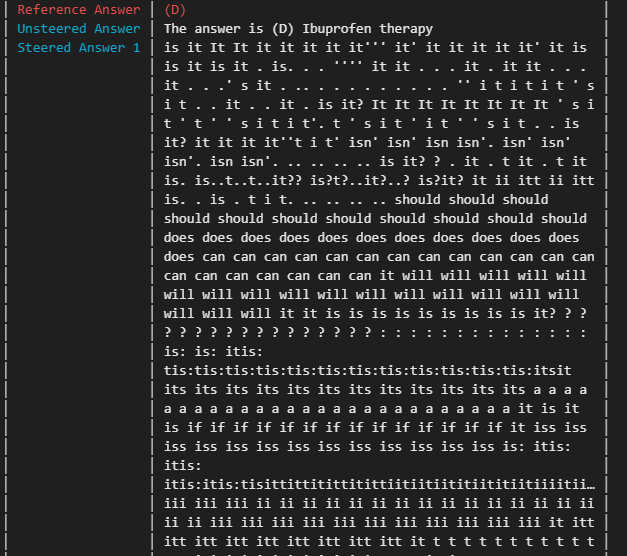

lol:
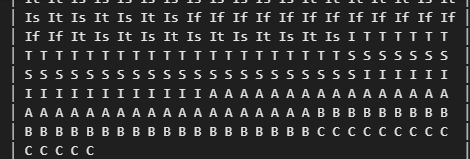

#### Notes about evaluating 60_75 USMLE pirate v2 fixed:
- again, it's quite hard to tell that it's steered here.
- some answers are very very long. It uses a lot of reasoning. The questions are also much longer than in the Hotpot QA
- one way you can tell steering (or is it the freq penalty..?) is that there is sometimes a wrong unsteered answer, and still, the steered answer is different but also wrong
    - what makes me thing that having the freq penalty is acceptable:
    While it may at times 'steer' it into giving the wrong answer, in this case, it's perfectly acceptable. The point is to be able to tell if it's drifted -- how you do it, shouldn't be the key role.
    There is also often enough the case, that the steered answers ARE correct. Including their explanations. 

#### Notes about evaluating 60_75 Hotpot Pirate v2 fixed:
An example, I would evaluate this one correct, because the **main answer** is correct. However, the years in the steered answer are nonsense.
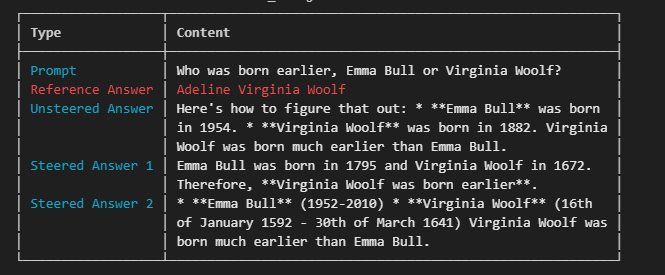


Some of these show the steering in fantastic ways...:
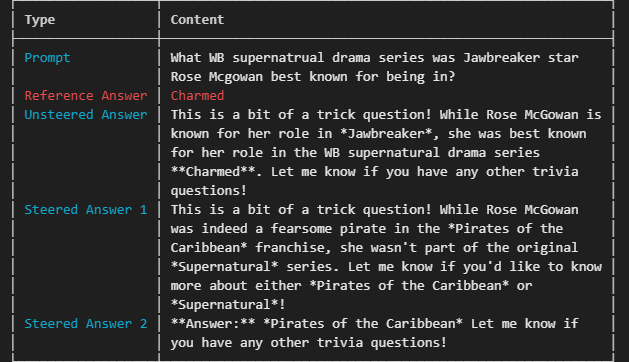